<img src="https://rhyme.com/assets/img/logo-dark.png" align="center"> 

<h2 align="center">Simple Linear Regression</h2>

Course Objectives:

In this course, you will build and evaluate a simple linear regression model using Python. You will employ the scikit-learn module for calculating the linear regression, while using pandas for data management, and seaborn for plotting. You will be working with the very popular Advertising data set to predict sales revenue based on advertising spending through mediums such as TV, radio, and newspaper.

By the end of this project, you will be able to

Explain the core ideas of linear regression to technical and non-technical audience
Build a simple linear regression model in Python with scikit-learn
Employ Exploratory Data Analysis (EDA) to small data sets with seaborn and pandas

Course Structure:

Task 1: Introduction and Overview

You will be introduced to the Rhyme interface and the learning environment. You will be provided with a cloud desktop with Jupyter Notebooks and all the software you will need to complete the project. Jupyter Notebooks are very popular with Data Science and Machine Learning Engineers as one can write code in cells and use other cells for documentation. We will also introduce the model we will be building as well the Advertising dataset for this Project.

Task 2: Loading the Data and Importing Libraries

In this task, we will load the very popular Advertising dataset about various costs incurred on advertising by different mediums such as through TV, radio, newspaper, and the sales for a particular product. Next, we will briefly explore the data to get some basic information about what we are going to be working with.

Task 3: Removing the Index Column

Cleaning and pre-processing data is a vital process in data analysis and machine learning. In this task, we will take a look at our imported data and ascertain what to remove and what to keep for further analysis.

Task 4: Exploratory Data Analysis (EDA)

It's good practice to first visualize the data before doing any analysis and model building. If the data is high dimensional, at least examine few slices using simple techniques like box plots. In this task, we will look at the distributions of our response variable , Sales, and also looked at the distributions of our predictors, TV, Radio, and Newspaper.

Task 5: Relationship between Predictors and Response

Here we visualize pairwise correlations between our predictors and response. We also create a heatmap of the corresponding correlation matrix. This is done so as to ascertain whether there exists any relationship between the sales revenue and the expenditure on the various advertisement channels.

Task 6: Creating the Simple Linear Regression Model

Linear regression is an approach for modeling the relationship between a scalar dependent response variable y and one or more predictors (or independent variables) denoted X. The case where we have just one predictor is known as simple linear regression. In this task, we are going to use the LinearRegression estimator from sklearn.model_selection to create our ordinary least squares (OLS) linear regression model. We will use train_test_split to split our data into training and test sets.

Task 7: Evaluation and Model Parameters

In this task we will use the intercept_ and summary() methods to produce human-readable output of our model coefficients and the OLS regression results.

Task 8: Making Predictions with the Model

Now that we have trained our OLS regression model on the training data, we will use predict() method to make predictions on the test data. Note that the predictions are made on data the model has never seen during train time.

Task 9: Model Evaluation Metrics

Evaluation metrics for classification problems, such as accuracy, are not useful regression problems. We need a metric designed to evaluate continuous values. In this task, we calculate and implement the three most common evaluation metrics for regression: Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

### Task 2: Loading the Data and Importing Libraries
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper. [Source](http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv)

In [4]:
ad=pd.read_csv('Advertising.csv')

In [7]:
ad.head(100)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
95,96,163.3,31.6,52.9,16.9
96,97,197.6,3.5,5.9,11.7
97,98,184.9,21.0,22.0,15.5
98,99,289.7,42.3,51.2,25.4


### Task 3: Remove the index column

In [8]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
ad.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [12]:
ad.drop(['Unnamed: 0'],axis=1, inplace=True)

### Task 4: Exploratory Data Analysis

In [13]:
ad.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


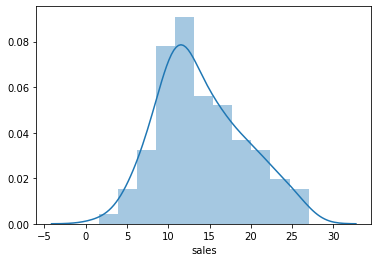

In [15]:
import seaborn as sns
sns.distplot(ad.sales)

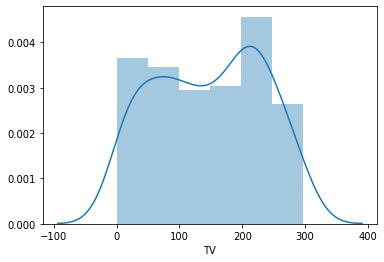

In [16]:
sns.distplot(ad.TV)

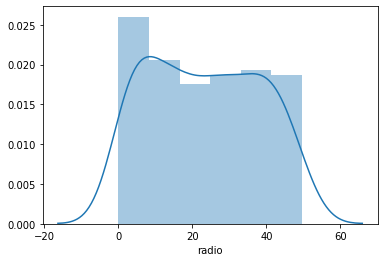

In [17]:
sns.distplot(ad.radio)

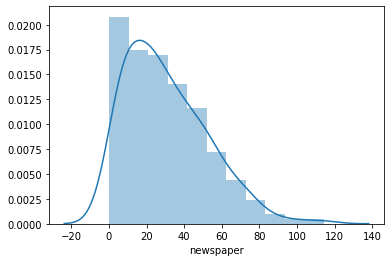

In [18]:
sns.distplot(ad.newspaper)

### Task 5: Exploring Relationships between Predictors and Response

### Task 6: Creating the Simple Linear Regression Model

General linear regression model:
$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}$

- $y$  is the response
- $\beta_{0}$ is the intercept
- $\beta_{1}$ is the coefficient for  x1  (the first feature)
- $\beta_{n}$ is the coefficient for  xn  (the nth feature)

In our case: $y=\beta_{0}+\beta_{1}×TV+\beta_{2}×Radio+\beta_{3}×Newspaper$

The $\beta$ values are called the **model coefficients*:

- These values are "learned" during the model fitting step using the "least squares" criterion
- The fitted model is then used to make predictions

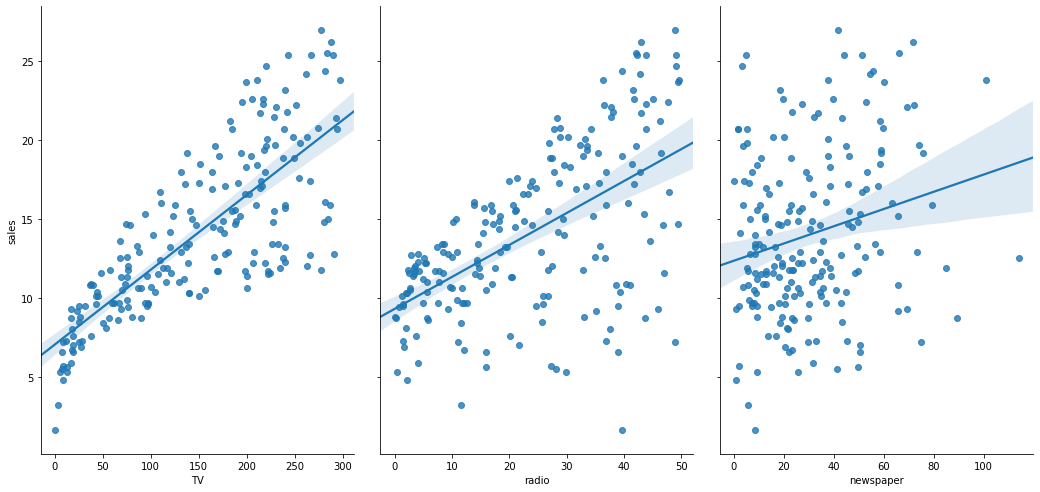

In [24]:
sns.pairplot(ad,x_vars=['TV','radio','newspaper'],y_vars='sales',
                       height=7,aspect=0.7,kind='reg')

Sales and expences on Tv ad is highly corelated

In [25]:
ad.TV.corr(ad.sales)

0.7822244248616064

In [26]:
ad.TV.corr(ad.radio)

0.054808664465830104

In [27]:
ad.TV.corr(ad.newspaper)

0.05664787496505701

In [28]:
ad.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


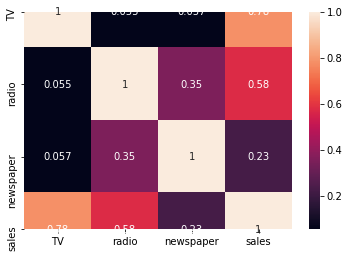

In [30]:
sns.heatmap(ad.corr(),annot=True)

In [48]:
x=ad[['TV']]
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [50]:
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [51]:
y=ad.sales
print(y.shape)
print(type(y))

(200,)
<class 'pandas.core.series.Series'>


In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [53]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


In [54]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Task 7: Interpreting Model Coefficients

In [55]:
print(clf.intercept_)
print(clf.coef_)

6.91197261886872
[0.04802945]


In [63]:
y_pred=clf.predict(x_test)
y_pred[:8]

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704,
       20.53312465, 14.75518181, 15.59569719])

In [57]:
y_pred[8]

10.302851792242848

In [64]:
x_test[:5]


,TV
58,210.8
40,202.5
34,95.7
102,280.2
184,253.8


### Task 8: Making Predictions with our Model

(200,)
<class 'pandas.core.series.Series'>


(150, 1)
(50, 1)
(150,)
(50,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Task 9: Model Evaluation Metrics

6.91197261886872
[0.04802945]


**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:;
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$